<a href="https://colab.research.google.com/github/Nache1/Meat-tax-Assignment/blob/main/labIntro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Intro notebook for the course: "Machine Learning in applied economic analysis"
### Promotionskolleg Module 6800, August 18-22, 2025

#### Instructors
- Kathy Baylis
- Thomas Heckelei
- Hugo Storm

#### Description
This notebook is intended to get you familiar with some of the most common data science / ML libaries typically used in python.
In this notebook you will 1) load data, 2) prepare the data for running your models, 3) run a simple logistic regression, 4) run a very simiple neural network, and 5) compare the results of the two models. You will learn in the course that a logistic regression is actually a special case of a very simple neural network! So if you have run a logistic regression you have actually worked with NN...

Work Steps

1. (If you are reading this in Github and haven't yet opened it in colab,) Open this notebook in google colab (https://colab.research.google.com/) using the link provided above. To run the notebook you need to have a google account.

2. Execute all code cells below (Runtime/Run all) and try to understand what is going on.

3. Two important python libraries for working with data in python are numpy and pandas. There are plenty of tutorials online to get you a first idea of how they work. Two examples are provided here. For taking the course you do not have to be an expert in using those libraries but having a first basic understanding of the functionality will certainly help you to follow the examples.
    
- Numpy: https://www.datacamp.com/community/tutorials/python-numpy-tutorial

- Pandas: https://pandas.pydata.org/docs/user_guide/10min.html   

4. (Optional) Play around with the notebook and make some changes (no worries you can not break it...). Here are some ideas what you can try to achieve:

- In the data set there are many more variables. Figure out how they are named and add a couple more variables to two models. Run the models and see how this changes the quality of the model prediction (in terms of R²).

-  If you want to go a step further... Create some new variables by adding interaction terms or square/cube terms. See if this increases model performance (R²).

- Are you up for the challenge (before even starting with the course)? The sklearn libary implements a large number of ML models. We will cover the most important ones in this course. In this notebook you have already seen how to use the logistic regression or a neural network in sklearn. Try to adjust the code to run an additional model, for example a random forest (will be covered on day 2 in the course). There are plenty of tutorials online (for example https://www.datacamp.com/community/tutorials/random-forests-classifier-python). Hint: there is basically only one line of code that you need to change in order to run an random forest with sklearn instead of a logistic regression.

#### Load relevant libs

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
import scipy.stats as stat
from scipy.stats import norm


#### Import data

In [2]:
# run this cell only once if you don't have wget installed
# its assumed you are using windows and have python installed
# only needed if you are running the notebook locally
# %pip install wget
#if not os.path.isfile('brazil_all_data_v2.gz'):
#    !python -m wget  https://ilr-ml.s3.eu-central-1.amazonaws.com/brazil_all_data_v2.gz
# Download data only once and make sure it is in the same folder as the notebook

# check if brazil_all_data_v2.gz is available in the current folder and if not, download it

if not os.path.isfile('brazil_all_data_v2.gz'):
    !wget  https://ilr-ml.s3.eu-central-1.amazonaws.com/brazil_all_data_v2.gz


--2025-08-14 08:39:32--  https://ilr-ml.s3.eu-central-1.amazonaws.com/brazil_all_data_v2.gz
Resolving ilr-ml.s3.eu-central-1.amazonaws.com (ilr-ml.s3.eu-central-1.amazonaws.com)... 3.5.139.150, 3.5.137.106, 52.219.171.174, ...
Connecting to ilr-ml.s3.eu-central-1.amazonaws.com (ilr-ml.s3.eu-central-1.amazonaws.com)|3.5.139.150|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 283350352 (270M) [application/x-gzip]
Saving to: ‘brazil_all_data_v2.gz’

brazil_all_data_v2. 100%[===================>] 270.22M  35.5MB/s    in 8.5s    

2025-08-14 08:39:41 (31.6 MB/s) - ‘brazil_all_data_v2.gz’ saved [283350352/283350352]



In [3]:
# Load data with pandas into a dataframe
df = pd.read_parquet('brazil_all_data_v2.gz')

#### Setup dependent and explantory variables

In [4]:
# Define binary variable for deforestration called D_defor_2018 from defor_2018
df['D_defor_2018'] = df['defor_2018']>0

In [5]:
# Add a variable, called constant, with only ones to the dataframe
df['constant'] = 1

In [6]:
# View first 5 rows of the data
df.head(5)

,id,row,col,lon,lat,bean,carrot,cassava,chickpea,citrus,...,tot_defor_2012_lag_3rd_order,tot_defor_2013_lag_3rd_order,tot_defor_2014_lag_3rd_order,tot_defor_2015_lag_3rd_order,tot_defor_2016_lag_3rd_order,tot_defor_2017_lag_3rd_order,tot_defor_2018_lag_3rd_order,s,D_defor_2018,constant
0,0,0,0,-59.989876,-10.010125,200.00000,335.00000,201.0,0.0,391.0,...,6.866667,0.733333,2.200000,4.466667,9.866667,6.600000,0.800000,1,False,1
1,1,0,1,-59.969875,-10.010125,200.00000,335.00000,201.0,0.0,391.0,...,5.105263,0.526316,0.947368,1.473684,9.473684,6.210527,2.000000,1,True,1
2,2,0,2,-59.949875,-10.010125,200.00000,335.00000,201.0,0.0,391.0,...,5.913043,4.086957,4.521739,4.956522,8.695652,11.217392,5.173913,1,False,1
3,3,0,3,-59.929874,-10.010125,200.00000,335.00000,201.0,0.0,391.0,...,5.407407,4.000000,3.925926,3.703704,5.888889,19.629629,6.518518,1,False,1
4,4,0,4,-59.909874,-10.010125,218.33334,435.83334,216.0,0.0,523.5,...,5.222222,7.592592,5.370370,4.481482,8.888889,18.888889,5.222222,1,True,1


In [7]:
# Define the dependent variable
Y = df['D_defor_2018']
# Define a list of variable names for explanatory variables
lstCols = [
  'wdpa_2017',
  'population_2015',
  'chirps_2017',
  'defor_2017',
  'maize',
  'soy',
  'sugarcane',
  'perc_treecover',
  'perm_water',
  'travel_min',
  'cropland',
  # 'pasture',
  'mean_elev',
  'sd_elev',
  'near_road',
  'defor_2017_lag_1st_order',
  'wdpa_2017_lag_1st_order',
  'chirps_2017_lag_1st_order',
  'population_2015_lag_1st_order',
  'maize_lag_1st_order',
  'soy_lag_1st_order',
  'sugarcane_lag_1st_order',
  'perc_treecover_lag_1st_order',
  'perm_water_lag_1st_order',
  'travel_min_lag_1st_order',
  'cropland_lag_1st_order',
  # 'pasture_lag_1st_order',
  'mean_elev_lag_1st_order',
  'sd_elev_lag_1st_order',
  'near_road_lag_1st_order',
#  'bean',
#  'carrot',
#  'cassava',
#  'chickpea',
#  'citrus',
#  'coffee',
#  'groundnut',
#  'maize',
#  'soy',
#  'sugarcane',
#  'tomato',
#  'wheat',
#  'defor_2001',
#  'defor_2002',
#  'defor_2003',
#  'defor_2004',
#  'defor_2005',
#  'defor_2006',
#  'defor_2007',
#  'defor_2008',
#  'defor_2009',
#  'defor_2010',
#  'defor_2011',
#  'defor_2012',
#  'defor_2013',
#  'defor_2014',
#  'defor_2015',
#  'defor_2016',
#  'defor_2017',
#  'near_dist_km',
#  'mean_elev_mts',
#  'sd_elev_mts',
 ]

# Get the explanatory Variables
X =  df.loc[:,lstCols]



In [8]:
# Split the data into train and test data using sklearn train_test_split object
#   (see: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

#   Note: This randomly splits the data in 80% train and 20% test data
X_train_raw, X_test_raw, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [9]:
X_train_raw.head(5)

,wdpa_2017,population_2015,chirps_2017,defor_2017,maize,soy,sugarcane,perc_treecover,perm_water,travel_min,...,maize_lag_1st_order,soy_lag_1st_order,sugarcane_lag_1st_order,perc_treecover_lag_1st_order,perm_water_lag_1st_order,travel_min_lag_1st_order,cropland_lag_1st_order,mean_elev_lag_1st_order,sd_elev_lag_1st_order,near_road_lag_1st_order
134320,0.0,0.147694,1789.2037,0.000000,1232.9999,884.16663,2223.1667,14.130468,1.00125,412.83936,...,1230.27830,879.91376,2207.8674,17.331165,1.004170,399.91327,0.246659,524.82013,12.822653,26.632896
36823,1.0,0.197424,2379.1616,0.051562,376.0000,216.00000,1398.0000,99.171875,1.00000,957.92682,...,690.28357,394.17764,1872.9740,94.711037,1.020147,984.60950,0.000000,303.77600,7.779138,193.960750
182568,1.0,0.457368,1285.8934,0.008281,1262.0000,464.00000,1760.0000,76.222809,1.00000,555.41656,...,1299.51500,479.58737,1809.2262,56.968361,1.000000,540.58868,0.073910,121.16037,5.836412,4.990441
68526,1.0,0.005725,1869.9226,0.000000,1345.5000,816.00000,2482.5000,91.336716,1.00000,935.75287,...,1352.86460,821.56598,2536.4097,78.856354,1.000020,913.03058,0.023149,379.80530,20.409077,16.868778
50254,0.0,0.102340,2126.6301,0.000625,1300.6667,755.00000,2923.8335,99.750313,1.00000,373.00620,...,1258.75000,734.51044,2855.1875,95.784828,1.000000,361.43732,0.032292,362.81091,9.187280,144.654370


In [10]:
# Scale data to 0-1 range using sklearn MinMaxScalar object. This facilitates training the model
# (see: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)
scaler = MinMaxScaler()
# Use only the train data to fit the MinMaxScalar
scaler.fit(X_train_raw)

# Apply the MinMax transformation to the train and test data
X_train = scaler.transform(X_train_raw)
X_test = scaler.transform(X_test_raw)
# Note the depended variable does not need to be scaled as it is a binary variable anyway

In [11]:
traindf = pd.DataFrame(X_train)
traindf.head(5)

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.0,1.954219e-05,0.513399,0.000000,0.186188,0.430722,0.350236,0.141305,0.00125,0.108384,...,0.169161,0.406183,0.318401,0.173305,0.005141,0.109103,0.255870,0.488585,0.131083,0.072618
1,1.0,2.612234e-05,0.833010,0.051562,0.048870,0.097305,0.217188,0.991719,0.00000,0.251838,...,0.077795,0.148921,0.261478,0.947175,0.024839,0.271409,0.000000,0.245892,0.077553,0.546542
2,1.0,6.051695e-05,0.240730,0.008281,0.190835,0.221058,0.275556,0.762228,0.00000,0.145907,...,0.180876,0.194157,0.250642,0.569713,0.000000,0.148153,0.076670,0.045391,0.056933,0.011319
3,1.0,7.574602e-07,0.557129,0.000000,0.204214,0.396707,0.392051,0.913367,0.00000,0.246002,...,0.189902,0.375280,0.374246,0.788613,0.000024,0.251539,0.024014,0.329368,0.211602,0.044963
4,0.0,1.354113e-05,0.696200,0.000625,0.197030,0.366267,0.463211,0.997503,0.00000,0.097901,...,0.173978,0.329173,0.428430,0.957914,0.000000,0.098422,0.033498,0.310709,0.092498,0.406891


In [12]:
# Fit a logistic regression model using sklearn (see: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
# Create the model object
modelLg = LogisticRegression(random_state=0,penalty=None,fit_intercept=True, max_iter=1000)
# Fit the model using the training data
modelLg.fit(X_train, Y_train)

LogisticRegression(max_iter=1000, penalty=None, random_state=0)

### Note:
sklearn is a popular ML libary that we will primarily use in the course. While sklearn allows to run
regressions it does not provide regression table outputs (with p-values, standard errors etc.).
While those table are very common in econometrics they are not commonly considered in the ML
community. For illustrative puposes we do the calculation for a regression table manually, however,
there is also a "statsmodels" libary in python that does this automatically (see below).

In [13]:
# Function to calculate pvalues and standard errors for a scikit-learn logisticRegression
# Source: https://stackoverflow.com/questions/25122999/scikit-learn-how-to-check-coefficients-significance
def logit_pvalue(model, x):
    """ Calculate z-scores for scikit-learn LogisticRegression.
    parameters:
        model: fitted sklearn.linear_model.LogisticRegression with intercept and large C
        x:     matrix on which the model was fit
    This function uses asymtptics for maximum likelihood estimates.
    """
    p = model.predict_proba(x)
    n = len(p)
    m = len(model.coef_[0]) + 1
    # m = len(model.coef_[0])
    # coefs = model.coef_[0]
    coefs = np.concatenate([model.intercept_, model.coef_[0]])
    x_full = np.matrix(np.insert(np.array(x), 0, 1, axis = 1))
    ans = np.zeros((m, m))
    for i in range(n):
        ans = ans + np.dot(np.transpose(x_full[i, :]), x_full[i, :]) * p[i,1] * p[i, 0]
    vcov = np.linalg.inv(np.matrix(ans))
    se = np.sqrt(np.diag(vcov))
    t =  coefs/se
    p = (1 - norm.cdf(abs(t))) * 2
    return se, p

In [14]:
# Use the previously created function to create a regression output table
se, p = logit_pvalue(modelLg, X_train)
coefs = np.concatenate([modelLg.intercept_, modelLg.coef_[0]]).T
resCoef = pd.DataFrame(coefs,index=['constant']+lstCols)
resCoef.columns = ['coef']
resCoef['se'] = se
resCoef['pval'] = p
resCoef

,coef,se,pval
constant,-1.947239,0.034255,0.000000e+00
wdpa_2017,-0.457660,0.064108,9.408030e-13
population_2015,0.813820,0.577331,1.586502e-01
chirps_2017,1.174738,0.689965,8.864190e-02
defor_2017,14.375842,0.291640,0.000000e+00
maize,0.430431,0.768060,5.751973e-01
soy,1.399561,0.575445,1.501006e-02
sugarcane,-1.259532,0.509655,1.346078e-02
perc_treecover,0.646002,0.032767,0.000000e+00
perm_water,-0.337284,0.269356,2.105021e-01


In [15]:
# Confirm the results using statsmodels
import statsmodels.api as sm
# Add constant to X matrix
X_train_const = np.matrix(np.insert(np.array(X_train), 0, 1, axis = 1))

# Define the logit regression
logit = sm.Logit(Y_train,X_train_const)

# Set the names of the explanatory variables
logit.data.xnames = exog_names=['const']+lstCols

# fit the model
result = logit.fit()
# Print the summary table
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.469894
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           D_defor_2018   No. Observations:               199952
Model:                          Logit   Df Residuals:                   199923
Method:                           MLE   Df Model:                           28
Date:                Thu, 14 Aug 2025   Pseudo R-squ.:                  0.1447
Time:                        08:42:55   Log-Likelihood:                -93956.
converged:                       True   LL-Null:                   -1.0985e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -1.9227      0.034    -56.021      0.

## Train your first very (very) simple neural network using sklearn
Now use a neural network for the same problem. In the course you will see that this is actually equivalent to a logistic regression, hence a logistic regression is in fact a specific form of a neural network!

### Perform a hyper parameter search to tune the learning rate for training the NN.
This step is optional and takes a while. You can also run the next cell,
using a fixed learning rate. The learning rate was determined using this hyper parameter search.

In [16]:
from scipy.stats import loguniform
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'alpha':loguniform(1e-6, 1e-1)}

modelNN = MLPClassifier(solver='lbfgs', activation = 'identity',
                     hidden_layer_sizes=(1), random_state=1, verbose=True,max_iter=200)


clf = RandomizedSearchCV(modelNN, param_grid, random_state=0,n_iter=10,cv=5)

X_train_const_ = np.asarray(X_train_const)
Y_train_ = np.asarray(Y_train)
modelNN = clf.fit(X_train_const_, Y_train_)
modelNN.best_params_

{'alpha': np.float64(0.06581332043291807)}

### Train the Neural Network with a fixed set of hyperparameter

In [17]:
modelNN = MLPClassifier(solver='lbfgs', alpha=8.264328927007723e-05,activation = 'identity',
                     hidden_layer_sizes=(1), random_state=1, verbose=True,max_iter=200)

modelNN.fit(X_train_const_, Y_train_)

MLPClassifier(activation='identity', alpha=8.264328927007723e-05,
              hidden_layer_sizes=1, random_state=1, solver='lbfgs',
              verbose=True)

In [18]:
# Add the estimated coefficient of the NN to the regression table we created above-
# In the course we will discuss why the estimated coefficient are similar.
#    modelNN.coefs_[0] are the coefficients of the first layer
#    modelNN.coefs_[1][0][0] is the coefficients of the hidden layer
resCoef['coef_NN'] = modelNN.coefs_[0]*modelNN.coefs_[1][0][0]
resCoef

,coef,se,pval,coef_NN
constant,-1.947239,0.034255,0.000000e+00,-0.373057
wdpa_2017,-0.457660,0.064108,9.408030e-13,-0.481224
population_2015,0.813820,0.577331,1.586502e-01,1.073394
chirps_2017,1.174738,0.689965,8.864190e-02,1.106636
defor_2017,14.375842,0.291640,0.000000e+00,14.643914
maize,0.430431,0.768060,5.751973e-01,0.270959
soy,1.399561,0.575445,1.501006e-02,1.208410
sugarcane,-1.259532,0.509655,1.346078e-02,-1.076687
perc_treecover,0.646002,0.032767,0.000000e+00,0.632139
perm_water,-0.337284,0.269356,2.105021e-01,0.439858


### Compare the model outcomes

In [19]:
# Add constant to the test data
X_test_const = np.asarray(np.insert(np.array(X_test), 0, 1, axis = 1))
# Get predicted values from logit model
Y_test_Lg = modelLg.predict(X_test)
# Get predicted values from NN model
Y_test_NN = modelNN.predict(X_test_const)

In [20]:
score_Lg = np.sum(Y_test==Y_test_Lg)/Y_test.shape[0]
score_NN = np.sum(Y_test==Y_test_NN)/Y_test.shape[0]
print('Score lg (R²): ',score_Lg)
print('Score NN (R²): ',score_NN)

Score lg (R²):  0.785448507641834
Score NN (R²):  0.7855685364487477


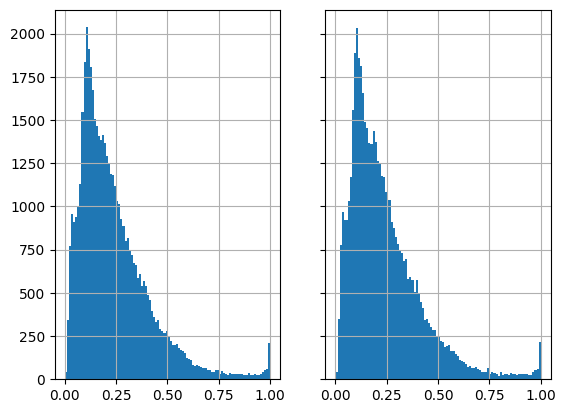

In [21]:
# plot the predicted probabalities of the logit and NN models
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

pd.DataFrame(modelLg.predict_proba(X_test))[1].hist(bins=100,ax=ax1)
pd.DataFrame(modelNN.predict_proba(X_test_const))[1].hist(bins=100,ax=ax2)
fig.show()

### Well done!!!
Now it is your turn. Play around with the notebook to make your very first steps with numpy/pandas and sklearn. In the intro text in the beginning there are some suggestions of what you can try.  

## Conclusion

As you can see from the R² scores and the histograms of the predicted probabilities, the logistic regression and the simple neural network with one hidden layer and identity activation function perform very similarly. This is because a logistic regression is a special case of a neural network.

You have now successfully loaded, prepared, and modeled data using both a logistic regression and a simple neural network. You have also compared their performance.

Feel free to continue exploring the data and models as suggested in the introduction!

In [25]:
# @title Default title text
# Define the dependent variable
Y1 = df['D_defor_2018']
# Define a list of variable names for explanatory variables
lstCols = [
  'bean',
  'carrot',
  'cassava',
  'chickpea',
  'citrus',
  'coffee',
  'groundnut',
  'maize',
  'soy',
  'sugarcane',
  'tomato',
  'wheat',
  'defor_2001',
  'defor_2002',
  'defor_2003',
  'defor_2004',
  'defor_2005',
  'defor_2006',
  'defor_2007',
  'defor_2008',
  'defor_2009',
  'defor_2010',
  'defor_2011',
  'defor_2012',
  'defor_2013',
  'defor_2014',
  'defor_2015',
  'defor_2016',
  'defor_2017',
  'mean_elev_lag_1st_order',
  'sd_elev_lag_1st_order',
  'near_road_lag_1st_order',
 ]

# Get the explanatory Variables
X1 =  df.loc[:,lstCols]


In [26]:
# Split the data into train and test data using sklearn train_test_split object
#   (see: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

#   Note: This randomly splits the data in 80% train and 20% test data
X_train_raw, X_test_raw, Y_train, Y_test = train_test_split(X1, Y1, test_size = 0.2)

In [27]:
X_train_raw.head(5)

,bean,carrot,cassava,chickpea,citrus,coffee,groundnut,maize,soy,sugarcane,...,defor_2011,defor_2012,defor_2013,defor_2014,defor_2015,defor_2016,defor_2017,mean_elev_lag_1st_order,sd_elev_lag_1st_order,near_road_lag_1st_order
7246,573.0000,1015.0,690.00000,0.0,1279.0000,734.0000,430.00000,1273.0000,606.0000,3304.0000,...,0.002031,0.003281,0.008125,0.000312,0.015781,0.020000,0.002500,284.20520,9.113100,317.291080
203697,786.0000,2023.0,491.00000,0.0,1265.0000,342.0000,676.00000,3014.0000,1116.0000,3298.0000,...,0.000937,0.003281,0.000000,0.000000,0.000000,0.000000,0.000000,137.55031,1.963414,16.720697
68175,776.0000,1121.0,748.00000,0.0,1472.0000,776.0000,544.00000,1366.0000,822.0000,3104.0000,...,0.005313,0.000781,0.000781,0.000000,0.000000,0.002969,0.004844,363.85767,8.870079,73.348770
65406,1288.0000,2183.0,1072.00000,0.0,2044.0000,1012.0000,980.00000,1858.0000,1363.0000,3131.0000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,337.67917,10.732629,4.692801
197783,1085.4445,2316.0,948.38885,0.0,1765.4445,763.9444,976.88892,2029.0555,1127.4443,3104.5557,...,0.000000,0.002031,0.000000,0.000156,0.000000,0.000000,0.000000,306.15784,16.690226,3.251455


In [28]:
# Scale data to 0-1 range using sklearn MinMaxScalar object. This facilitates training the model
# (see: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)
scaler = MinMaxScaler()
# Use only the train data to fit the MinMaxScalar
scaler.fit(X_train_raw)

# Apply the MinMax transformation to the train and test data
X_train = scaler.transform(X_train_raw)
X_test = scaler.transform(X_test_raw)
# Note the depended variable does not need to be scaled as it is a binary variable anyway

In [29]:
traindf = pd.DataFrame(X_train)
traindf.head(5)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.285268,0.206237,0.555556,0.0,0.368694,0.615516,0.249847,0.192597,0.291916,0.524508,...,0.002277,0.003456,0.009199,0.000331,0.017707,0.020392,0.002500,0.224405,0.091711,0.895851
1,0.396148,0.423011,0.391770,0.0,0.364658,0.281330,0.400122,0.471559,0.546407,0.523541,...,0.001051,0.003456,0.000000,0.000000,0.000000,0.000000,0.000000,0.063387,0.015827,0.044543
2,0.390942,0.229032,0.603292,0.0,0.424330,0.651321,0.319487,0.207499,0.399701,0.492261,...,0.005954,0.000823,0.000884,0.000000,0.000000,0.003027,0.004844,0.311859,0.089131,0.204931
3,0.657470,0.457419,0.869959,0.0,0.589219,0.852515,0.585828,0.286332,0.669661,0.496614,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.283116,0.108900,0.010476
4,0.552027,0.486022,0.768221,0.0,0.508920,0.641044,0.583927,0.313741,0.552118,0.492350,...,0.000000,0.002140,0.000000,0.000166,0.000000,0.000000,0.000000,0.248508,0.172132,0.006394


In [30]:
# Create the model object
modelLg = LogisticRegression(random_state=0,penalty=None,fit_intercept=True, max_iter=1000)
# Fit the model using the training data
modelLg.fit(X_train, Y_train)

LogisticRegression(max_iter=1000, penalty=None, random_state=0)

In [31]:
# Function to calculate pvalues and standard errors for a scikit-learn logisticRegression
# Source: https://stackoverflow.com/questions/25122999/scikit-learn-how-to-check-coefficients-significance
def logit_pvalue(model, x):
    """ Calculate z-scores for scikit-learn LogisticRegression.
    parameters:
        model: fitted sklearn.linear_model.LogisticRegression with intercept and large C
        x:     matrix on which the model was fit
    This function uses asymtptics for maximum likelihood estimates.
    """
    p = model.predict_proba(x)
    n = len(p)
    m = len(model.coef_[0]) + 1
    # m = len(model.coef_[0])
    # coefs = model.coef_[0]
    coefs = np.concatenate([model.intercept_, model.coef_[0]])
    x_full = np.matrix(np.insert(np.array(x), 0, 1, axis = 1))
    ans = np.zeros((m, m))
    for i in range(n):
        ans = ans + np.dot(np.transpose(x_full[i, :]), x_full[i, :]) * p[i,1] * p[i, 0]
    vcov = np.linalg.inv(np.matrix(ans))
    se = np.sqrt(np.diag(vcov))
    t =  coefs/se
    p = (1 - norm.cdf(abs(t))) * 2
    return se, p

In [32]:
se, p = logit_pvalue(modelLg, X_train)
coefs = np.concatenate([modelLg.intercept_, modelLg.coef_[0]]).T
resCoef = pd.DataFrame(coefs,index=['constant']+lstCols)
resCoef.columns = ['coef']
resCoef['se'] = se
resCoef['pval'] = p
resCoef

,coef,se,pval
constant,-2.059487,0.031551,0.000000e+00
bean,2.539816,0.334778,3.286260e-14
carrot,-1.858552,0.283603,5.625433e-11
cassava,1.363481,0.149890,0.000000e+00
chickpea,-1.207586,0.202208,2.343644e-09
citrus,0.311308,0.104078,2.779668e-03
coffee,1.561064,0.141472,0.000000e+00
groundnut,-0.241662,0.223464,2.795029e-01
maize,-0.195286,0.203804,3.379593e-01
soy,0.319391,0.358561,3.730603e-01


In [33]:
# Confirm the results using statsmodels
import statsmodels.api as sm
# Add constant to X matrix
X_train_const = np.matrix(np.insert(np.array(X_train), 0, 1, axis = 1))

# Define the logit regression
logit = sm.Logit(Y_train,X_train_const)

# Set the names of the explanatory variables
logit.data.xnames = exog_names=['const']+lstCols

# fit the model
result = logit.fit()
# Print the summary table
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.481671
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           D_defor_2018   No. Observations:               199952
Model:                          Logit   Df Residuals:                   199919
Method:                           MLE   Df Model:                           32
Date:                Thu, 14 Aug 2025   Pseudo R-squ.:                  0.1234
Time:                        09:06:41   Log-Likelihood:                -96311.
converged:                       True   LL-Null:                   -1.0987e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -2.0616      0.032    -65.306      0.000      -2.123   

In [34]:
from scipy.stats import loguniform
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'alpha':loguniform(1e-6, 1e-1)}

modelNN = MLPClassifier(solver='lbfgs', activation = 'identity',
                     hidden_layer_sizes=(1), random_state=1, verbose=True,max_iter=200)


clf = RandomizedSearchCV(modelNN, param_grid, random_state=0,n_iter=10,cv=5)

X_train_const_ = np.asarray(X_train_const)
Y_train_ = np.asarray(Y_train)
modelNN = clf.fit(X_train_const_, Y_train_)
modelNN.best_params_

{'alpha': np.float64(0.0016961746387291002)}

In [35]:
modelNN = MLPClassifier(solver='lbfgs', alpha=8.264328927007723e-05,activation = 'identity',
                     hidden_layer_sizes=(1), random_state=1, verbose=True,max_iter=200)

modelNN.fit(X_train_const_, Y_train_)

MLPClassifier(activation='identity', alpha=8.264328927007723e-05,
              hidden_layer_sizes=1, random_state=1, solver='lbfgs',
              verbose=True)

In [36]:
resCoef['coef_NN'] = modelNN.coefs_[0]*modelNN.coefs_[1][0][0]
resCoef


,coef,se,pval,coef_NN
constant,-2.059487,0.031551,0.000000e+00,-0.559700
bean,2.539816,0.334778,3.286260e-14,2.962669
carrot,-1.858552,0.283603,5.625433e-11,-1.985866
cassava,1.363481,0.149890,0.000000e+00,1.345630
chickpea,-1.207586,0.202208,2.343644e-09,-1.382362
citrus,0.311308,0.104078,2.779668e-03,0.327091
coffee,1.561064,0.141472,0.000000e+00,1.487184
groundnut,-0.241662,0.223464,2.795029e-01,-0.361638
maize,-0.195286,0.203804,3.379593e-01,-0.228051
soy,0.319391,0.358561,3.730603e-01,0.107562


In [37]:
# Add constant to the test data
X_test_const = np.asarray(np.insert(np.array(X_test), 0, 1, axis = 1))
# Get predicted values from logit model
Y_test_Lg = modelLg.predict(X_test)
# Get predicted values from NN model
Y_test_NN = modelNN.predict(X_test_const)

In [38]:
score_Lg = np.sum(Y_test==Y_test_Lg)/Y_test.shape[0]
score_NN = np.sum(Y_test==Y_test_NN)/Y_test.shape[0]
print('Score lg (R²): ',score_Lg)
print('Score NN (R²): ',score_NN)

Score lg (R²):  0.781827638633272
Score NN (R²):  0.782047691445947


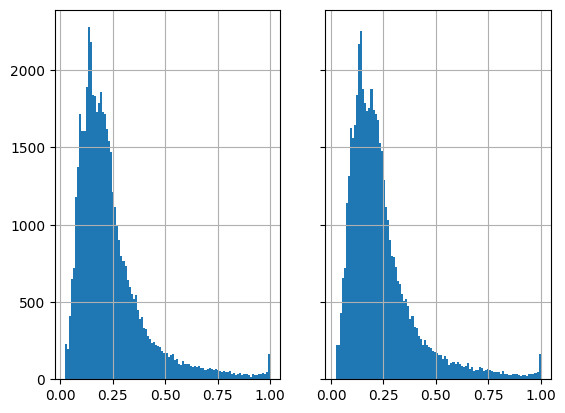

In [39]:
# plot the predicted probabalities of the logit and NN models
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

pd.DataFrame(modelLg.predict_proba(X_test))[1].hist(bins=100,ax=ax1)
pd.DataFrame(modelNN.predict_proba(X_test_const))[1].hist(bins=100,ax=ax2)
fig.show()